In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from numpy.random import seed
import math, time

In [6]:
seed(1)
import tensorflow as tf
tf.random.set_seed(1)


In [7]:
def normalize(df):
    sc = MinMaxScaler(feature_range = (0, 1))
    df=sc.fit_transform(df)
    df=pd.DataFrame(df)
    df.columns=['Open','High','Low','Ma_5','Ma_10','K','D','Rsi_5','Macd','Willr','Upperband','Middleband','Lowerband',"Close"]
    return df
def denormalize(df, norm_value):
    original_value = df['Close'].values.reshape(-1,1)
    norm_value = norm_value.reshape(-1,1)
    min_max_scaler = MinMaxScaler()
    min_max_scaler.fit_transform(original_value)
    denorm_value = min_max_scaler.inverse_transform(norm_value)
    return denorm_value

In [8]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.values#pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = stock
    y=stock["Close"].shift(-seq_len)
    y = np.array(y)
    result = np.array(result)
    row = round(0.7 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = y[:int(row)]
    x_test = result[int(row):result.shape[0]-1, :-1]
    y_test = y[int(row):len(y)-1]
    return [x_train, y_train, x_test, y_test]

In [12]:
df=pd.read_excel("人豪資料.xls")
df=df[['Open','High','Low','Ma_5','Ma_10','K','D','Rsi_5','Macd','Willr','Upperband','Middleband','Lowerband',"Close"]]
df1=df

In [13]:
df=normalize(df)


In [14]:
df

,Open,High,Low,Ma_5,Ma_10,K,D,Rsi_5,Macd,Willr,Upperband,Middleband,Lowerband,Close
0,0.093936,0.101220,0.086131,0.106026,0.123495,0.184015,0.138999,0.267578,0.343582,0.313693,0.115204,0.106026,0.095662,0.099688
1,0.099691,0.099191,0.080745,0.099429,0.118294,0.168091,0.159849,0.166531,0.337999,0.070130,0.112265,0.099429,0.085156,0.082794
2,0.082768,0.082947,0.059006,0.088139,0.111002,0.104129,0.143867,0.097899,0.325446,0.049540,0.107949,0.088139,0.066390,0.061510
3,0.061521,0.075028,0.047879,0.083116,0.104430,0.094751,0.112975,0.287687,0.323398,0.276499,0.102147,0.083116,0.062325,0.074156
4,0.074031,0.085440,0.068255,0.078709,0.097102,0.176167,0.115770,0.276670,0.322884,0.269023,0.096161,0.078709,0.059745,0.072390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,0.470251,0.477443,0.458986,0.502856,0.536476,0.341663,0.350952,0.355806,0.307651,0.312320,0.507276,0.502856,0.490065,0.481075
1240,0.481111,0.510657,0.490142,0.510262,0.530590,0.440091,0.377668,0.551990,0.324255,0.622464,0.519434,0.510262,0.492085,0.521450
1241,0.521484,0.519531,0.522459,0.512982,0.528369,0.624917,0.472790,0.534681,0.337601,0.746966,0.524477,0.512982,0.492192,0.518091
1242,0.518087,0.541631,0.527600,0.516949,0.528929,0.816738,0.637202,0.631901,0.360315,0.901540,0.536430,0.516949,0.487272,0.540620


In [15]:
window = 1
X_train, y_train, X_test, y_test = load_data(df, window)

In [16]:
y_test

array([0.1006977 , 0.09979407, 0.09834329, 0.09582804, 0.09774639,
       0.09876443, 0.09793541, 0.09950226, 0.09710142, 0.09680297,
       0.09791883, 0.09703344, 0.10131118, 0.099935  , 0.10281834,
       0.09959842, 0.10041749, 0.09955863, 0.10067781, 0.09972941,
       0.0998919 , 0.09898495, 0.09793375, 0.09827365, 0.09851241,
       0.09913915, 0.09838308, 0.10211201, 0.10420777, 0.10563203,
       0.10474995, 0.10736468, 0.11115164, 0.12922924, 0.1273341 ,
       0.13060707, 0.13044624, 0.13437911, 0.14216692, 0.12995878,
       0.13257185, 0.13191361, 0.14103946, 0.14140423, 0.1386668 ,
       0.14152361, 0.14014577, 0.1435945 , 0.1353242 , 0.13808981,
       0.14163304, 0.14129977, 0.14286662, 0.14375698, 0.15011722,
       0.14456279, 0.14128982, 0.14305895, 0.13762556, 0.13981582,
       0.13948919, 0.14134454, 0.13423652, 0.13651633, 0.13427963,
       0.13759571, 0.13661249, 0.14049065, 0.1395323 , 0.14402061,
       0.13570389, 0.11506959, 0.12010505, 0.11379953, 0.11718

In [17]:
X_test

array([[0.10702538, 0.10461382, 0.10875778, ..., 0.10110247, 0.10443365,
        0.10789884],
       [0.10604222, 0.10383002, 0.10266512, ..., 0.10113198, 0.10439293,
        0.10778143],
       [0.10067379, 0.09829956, 0.09926219, ..., 0.10133974, 0.1040152 ,
        0.10676511],
       ...,
       [0.48111102, 0.51065684, 0.49014187, ..., 0.5194343 , 0.51026173,
        0.49208523],
       [0.52148366, 0.51953063, 0.52245948, ..., 0.52447673, 0.51298222,
        0.49219163],
       [0.51808653, 0.54163137, 0.52759953, ..., 0.53642982, 0.51694925,
        0.48727207]])

In [18]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (871, 13)
y_train (871,)
X_test (372, 13)
y_test (372,)


In [19]:
y_train

array([0.08279419, 0.06150994, 0.07415581, 0.07239   , 0.08183253,
       0.09071299, 0.08838842, 0.08046797, 0.09409042, 0.08805018,
       0.10358767, 0.11288927, 0.11523373, 0.13006987, 0.11888308,
       0.13165993, 0.13280895, 0.12011334, 0.10964614, 0.11509612,
       0.107368  , 0.10539327, 0.11699789, 0.1221262 , 0.11780701,
       0.12726778, 0.12599441, 0.1355215 , 0.13575694, 0.13433269,
       0.12346424, 0.11066086, 0.10066454, 0.09928837, 0.09174429,
       0.1044714 , 0.09796857, 0.09825873, 0.08260186, 0.08349389,
       0.08390508, 0.07703582, 0.08244601, 0.08933682, 0.0942413 ,
       0.09413021, 0.09115071, 0.09431094, 0.08818614, 0.08695587,
       0.08148932, 0.07582214, 0.07836226, 0.06467182, 0.06010393,
       0.06150497, 0.05963138, 0.06366374, 0.06956304, 0.05936112,
       0.05891511, 0.05630038, 0.06096611, 0.06303534, 0.05891345,
       0.06012216, 0.06190124, 0.07789303, 0.07724308, 0.07918298,
       0.08513866, 0.08027066, 0.07759458, 0.08206797, 0.08393

In [20]:
y_train.shape

(871,)

In [22]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [24]:
trainPredict = clfreg.predict(X_train)
testPredict =clfreg.predict(X_test)
x = denormalize(df1, y_train)
train_stock_price = denormalize(df1, trainPredict)
y = denormalize(df1, y_test)
predicted_stock_price = denormalize(df1, testPredict)

In [25]:
print("y_real",y.shape)
print("y_predict",y.shape)

y_real (372, 1)
y_predict (372, 1)


In [26]:
predicted_stock_price

array([[ 9667.94648753],
       [ 9254.8276066 ],
       [ 9084.78188494],
       [ 9142.51604188],
       [ 8927.07685248],
       [ 9116.60732249],
       [ 9179.81930812],
       [ 9090.88195087],
       [ 9246.21204592],
       [ 9023.99540778],
       [ 8990.59958646],
       [ 9194.96284735],
       [ 8982.1786771 ],
       [ 9425.4469295 ],
       [ 9277.84260423],
       [ 9444.26839901],
       [ 9172.96261724],
       [ 9221.65553355],
       [ 9226.04540732],
       [ 9321.4161677 ],
       [ 9242.01798017],
       [ 9225.7337859 ],
       [ 9168.86324523],
       [ 9063.41757091],
       [ 9152.9022079 ],
       [ 9164.45938111],
       [ 9251.10839246],
       [ 9110.66583487],
       [ 9551.51364076],
       [ 9621.04003816],
       [ 9634.48910553],
       [ 9559.28033215],
       [ 9793.73932964],
       [10012.07699847],
       [10830.73880623],
       [10919.73662519],
       [11132.82786971],
       [11082.42786766],
       [11367.56846507],
       [11689.66825183],


In [27]:
y

array([[ 9302. ],
       [ 9247.5],
       [ 9160. ],
       [ 9008.3],
       [ 9124. ],
       [ 9185.4],
       [ 9135.4],
       [ 9229.9],
       [ 9085.1],
       [ 9067.1],
       [ 9134.4],
       [ 9081. ],
       [ 9339. ],
       [ 9256. ],
       [ 9429.9],
       [ 9235.7],
       [ 9285.1],
       [ 9233.3],
       [ 9300.8],
       [ 9243.6],
       [ 9253.4],
       [ 9198.7],
       [ 9135.3],
       [ 9155.8],
       [ 9170.2],
       [ 9208. ],
       [ 9162.4],
       [ 9387.3],
       [ 9513.7],
       [ 9599.6],
       [ 9546.4],
       [ 9704.1],
       [ 9932.5],
       [11022.8],
       [10908.5],
       [11105.9],
       [11096.2],
       [11333.4],
       [11803.1],
       [11066.8],
       [11224.4],
       [11184.7],
       [11735.1],
       [11757.1],
       [11592. ],
       [11764.3],
       [11681.2],
       [11889.2],
       [11390.4],
       [11557.2],
       [11770.9],
       [11750.8],
       [11845.3],
       [11899. ],
       [12282.6],
       [11

In [28]:
import matplotlib.pyplot as plt 

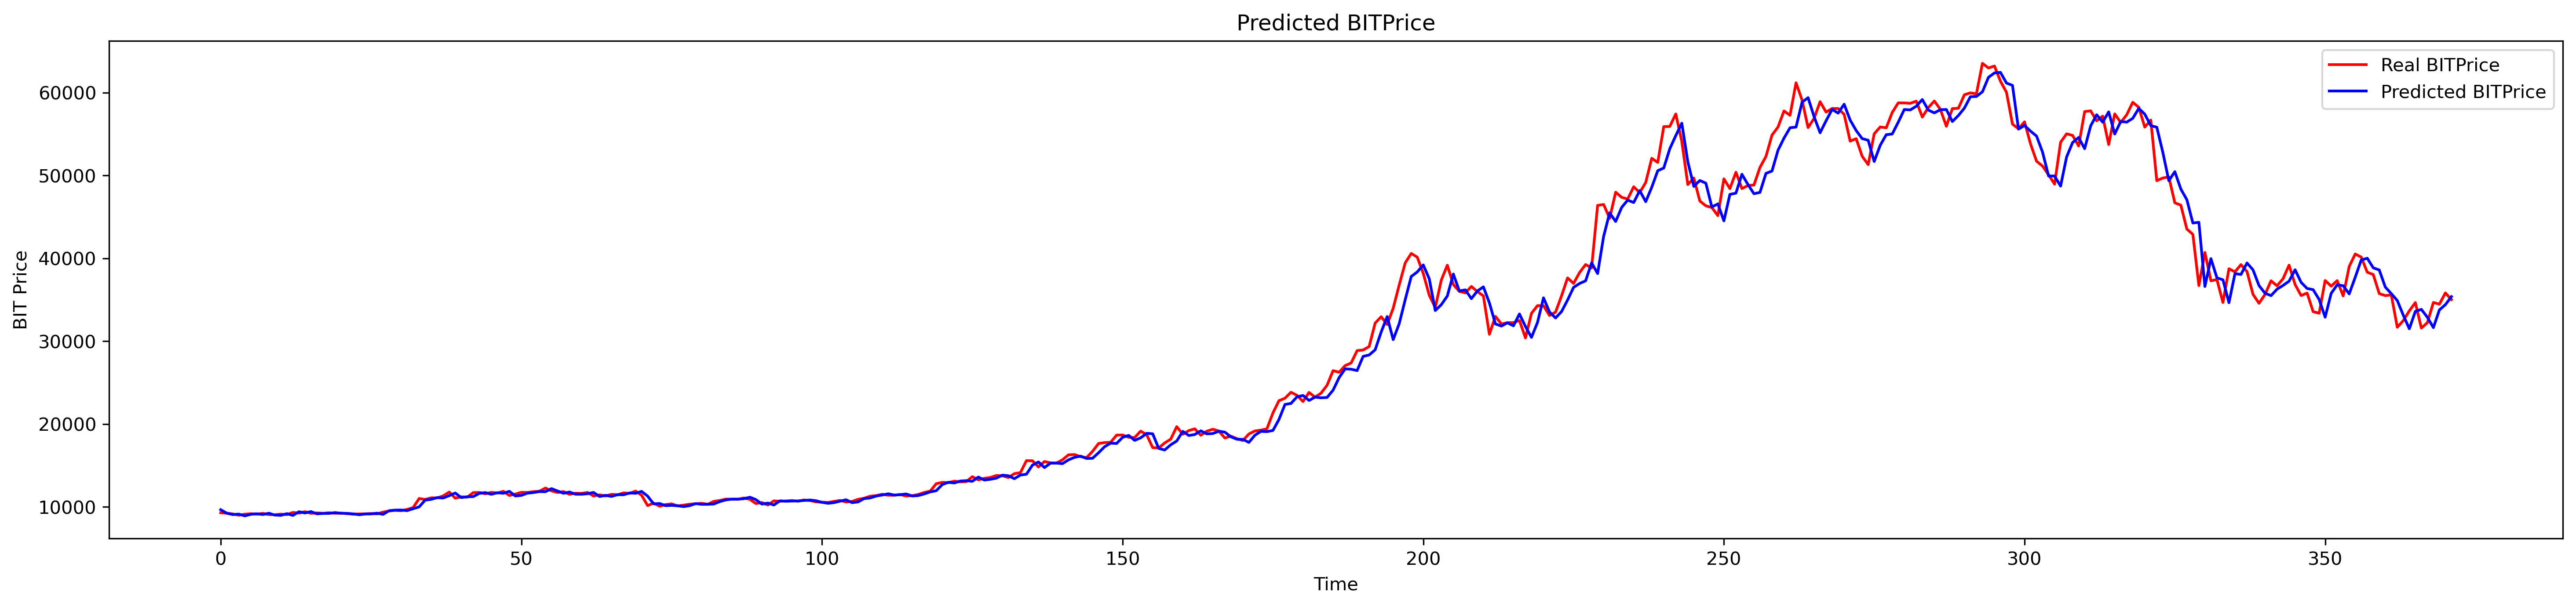

In [29]:
plt.figure(figsize=(24,5),dpi= 300)
plt.plot(y, color = 'red', label = 'Real BITPrice') 
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BITPrice') 
plt.title('Predicted BITPrice')
plt.xlabel('Time')
plt.ylabel('BIT Price')
plt.legend()
plt.show()

In [30]:
mse=np.sum((y-predicted_stock_price)**2)/len(predicted_stock_price)
print(mse)
rmse=mse**0.5
print(rmse)
mae = np.sum(np.absolute(y-predicted_stock_price)) / len(y)
print(mae)

mape=np.mean(np.abs((y-predicted_stock_price) / y)) * 100
print(mape)

2921742.9579807236
1709.310667485792
1077.5162968809543
3.162798675682311


In [31]:
from numba import cuda
cuda.select_device(0)
cuda.close()